In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from torchvision import transforms
import torch
import glob
import cv2 as cv
from PIL import Image
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# set the image label directory
label = pd.read_excel('totallabel.xlsx', index_col=0)  

In [4]:
label.head()

,label
id,
image_0,Pipe
image_1,Pipe
image_2,Pipe
image_3,Pipe
image_4,Pipe


Class Airport: 175
Class Building: 150
Class Car: 150
Class Bridge: 140
Class Railway: 65
Class Pipe: 60
Class Power_plant: 60


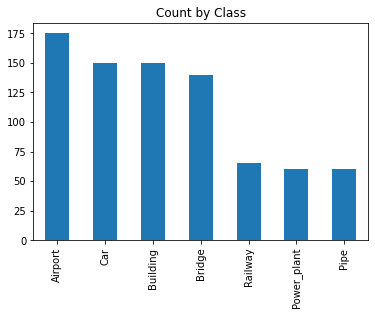

In [5]:
# summary of our image classes
target_count = label.label.value_counts()
print('Class Airport:', target_count["Airport"])
print('Class Building:', target_count["Building"])
print('Class Car:', target_count["Car"])
print('Class Bridge:', target_count["Bridge"])
print('Class Railway:', target_count["Railway"])
print('Class Pipe:', target_count["Pipe"])
print('Class Power_plant:', target_count["Power_plant"])

target_count.plot(kind='bar', title='Count by Class');

In [6]:
# check what types of image we get
#set the image directory
files = os.listdir("./dddd/")
# print the types of image
print(set([x.split(".")[1] for x in files]))

{'png', 'jpg', 'jpeg'}


In [7]:
# prepare the directory for each image type
extensions = ("*.png","*.jpg","*.jpeg",)
path = []
for extension in extensions:
    path.extend(glob.glob("./dddd/"+extension))

In [8]:
# set the resize transform
transform = transforms.Resize((500,500))

In [9]:
# read data
cv_img = []
for img in path:
    # read image > to Tensor > permute the data > resize > flatten
    n = torch.flatten(transform(torch.permute(torch.tensor(cv.imread(img)),(2,0,1))))
    cv_img.append(np.array(n))

In [10]:
# check the data 
cv_img[0]

array([110, 109, 112, ...,   6,   6,   6], dtype=uint8)

In [11]:
# flattened image as X
X = np.array(cv_img)

In [12]:
# label as y
y = np.array(label)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [14]:
# set the random forest model 
rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                  max_samples=1,random_state=0)

In [15]:
rf = rf_model.fit(X_train, y_train)

In [16]:
test_preds = rf_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 44.000
